In [59]:
import pandas as pd
import numpy as np


In [60]:
data = pd.read_csv("data/ortho_knnnb.csv")

Section I : Accessing the Data


Make a pandas DataFrame from the CSV
How many variables does the dataset contain?


What is the data about?
What are we trying to predict here?


<h1> Observation </h1>
<ol>
<li> data have <b>7 Features</b> and <b>310 rows</b></li>
<li> Objective: classsify bone class as nornal or adnormal depending on the featurea </li>
</ol>

In [61]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [62]:
data.shape

(310, 7)

In [63]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [64]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [66]:
missing_val = data.isnull().sum()
missing_val

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [67]:
import seaborn as sns

In [68]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Section II : Exploratory Data Analysis


Perform some descriptive statistics and make a note of your findings


Plot appropriate graphs to understand the relation between the variables.


Point out any observations and comment on the strength of the relationships if any.

<AxesSubplot:xlabel='class', ylabel='count'>

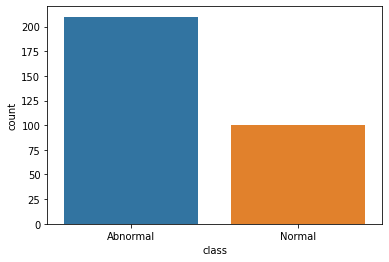

In [69]:
sns.countplot(x=data['class'], data = data)

Observation

pelvic_incidence, pelvic_tilt numeric ,degree_spondylolisthesis seems to be a major factor of the classification 

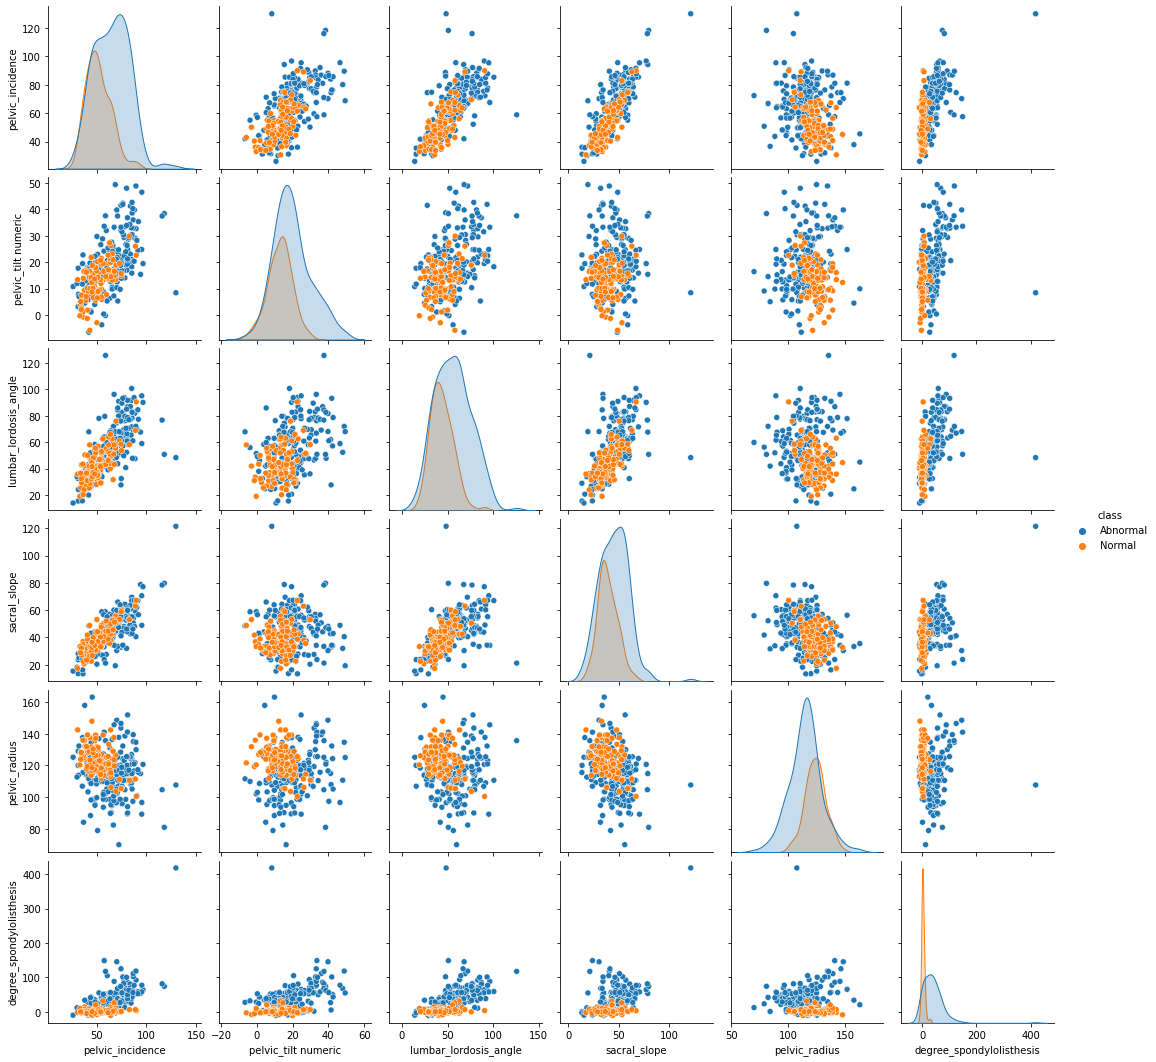

In [70]:
sns.pairplot(data, hue='class')

ection II : Exploratory Data Analysis¶


Perform some descriptive statistics and make a note of your findings


Plot appropriate graphs to understand the relation between the variables.


Point out any observations and comment on the strength of the relationships if any.

In [71]:
data_corr = data.corr()
data_corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000



Section III : Prepare data for Training!


Make a new column symptom_class with the abnormal rows as 1 and the normal rows as 0, drop the class column


Split the entire dataset into independent features and symptoms as the response variable


Normalize the variables.

In [72]:
df = data.copy()
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [73]:
df['is_abnormal'] = df['class'].map({'Abnormal':1,'Normal':0})
df = df.drop('class', axis=1)
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,is_abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [74]:
X = df.drop('is_abnormal', axis=1)
y = df['is_abnormal']

In [75]:
X = X / X.sum()
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.003361,0.004147,0.002460,0.003040,0.002699,-0.000031
1,0.002083,0.001850,0.001554,0.002178,0.003130,0.000560
2,0.003670,0.004086,0.003112,0.003501,0.002899,-0.000433
3,0.003695,0.004533,0.002752,0.003353,0.002787,0.001375
4,0.002651,0.001775,0.001759,0.003009,0.002959,0.000971
...,...,...,...,...,...,...
305,0.002554,0.002504,0.002236,0.002575,0.003213,-0.000521
306,0.002876,0.003810,0.001815,0.002494,0.003129,-0.000052
307,0.003276,0.004173,0.002868,0.002910,0.003438,-0.000332
308,0.002413,0.001599,0.002583,0.002746,0.003243,0.000026



Section IV : Training with KNN

Use train_test_split from sklearn and split the parameters and classes into train and test sets


Starting with three nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.


Try with increasing the k value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of k.


Evaluate your final model using appropriate metrics for classification and comment on them.

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.25)

In [78]:
print(f"len of test_x:{len(test_x)}, test_y:{len(test_y)}")
print(f"len of train_x:{len(train_x)}, train_y:{len(train_y)}")

len of test_x:78, test_y:78
len of train_x:232, train_y:232


In [79]:
from sklearn.neighbors import KNeighborsClassifier


## Training the Knn MODEL

In [80]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x, train_y)
pred = KNN.predict(test_x)
pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [81]:
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))


The accuracy of the KNN with K=3 is 82.05%


In [82]:
train_accuracy = []
test_accuracy = []

for k in range(1,16):                                 # K from 1 to 15
    KNN = KNeighborsClassifier(n_neighbors=k)         #KNN Classifier with K = k
    KNN.fit(train_x, train_y)

    train_pred = KNN.predict(train_x)                 #prediction on trian data
    train_score = accuracy_score(train_y,train_pred)  #Train accuracy
    train_accuracy.append(train_score)
    
    test_pred = KNN.predict(test_x)                   #prediction on test data
    test_score = accuracy_score(test_y,test_pred)     #test accuracy
    test_accuracy.append(test_score)  
    
print("Best accuracy is {} with K = {}".format(100*max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))

Best accuracy is 85.8974358974359 with K = 5


In [83]:
for i,acc in enumerate(test_accuracy):
    print(i+1, 100* round(acc,4))


1 80.77
2 80.77
3 82.05
4 80.77
5 85.9
6 83.33
7 84.61999999999999
8 84.61999999999999
9 85.9
10 84.61999999999999
11 84.61999999999999
12 83.33
13 84.61999999999999
14 84.61999999999999
15 85.9


In [84]:
import matplotlib.pyplot as plt


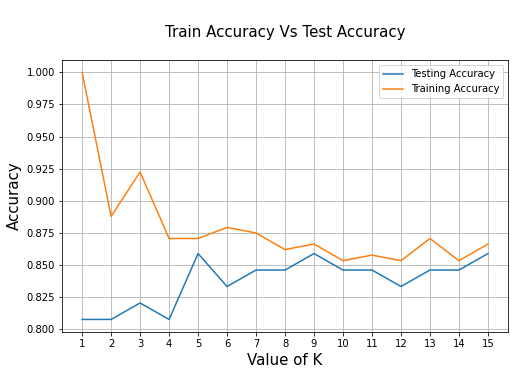

In [85]:
#Accuracy Plot
plt.figure(figsize=[8,5])
plt.plot(range(1,16), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,16), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('\nTrain Accuracy Vs Test Accuracy\n',fontsize=15)
plt.xlabel('Value of K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xticks(range(1,16))
plt.grid()
plt.show()

In [86]:
KNN = KNeighborsClassifier(n_neighbors=5)         #KNN Classifier with K = k
KNN.fit(train_x, train_y)

KNeighborsClassifier()

In [87]:
y_pred = KNN.predict(test_x)

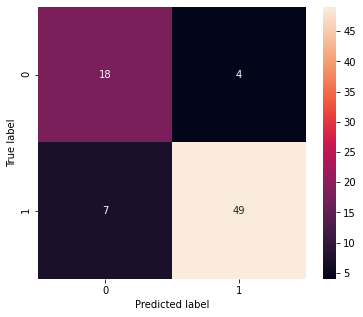

In [92]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [98]:
print("Accuracy: " ,accuracy_score(test_y, y_pred))



Accuracy:  0.8589743589743589


In [100]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.92      0.88      0.90        56

    accuracy                           0.86        78
   macro avg       0.82      0.85      0.83        78
weighted avg       0.87      0.86      0.86        78



Section V : Training with Naive Bayes
Now , fit a Naive Bayes Classifier to the same data.

Train a NB model with default arguments and make a note of training and test metrics

What are your inferences on the relative performance between the KNN and NB based models?

Which of these models would you recommend and with what reasons ?


In [48]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_x, train_y)

GaussianNB()

In [49]:
y_pred = nvclassifier.predict(test_x)
print(y_pred)

[1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 1 0]


In [50]:
test_x = test_x.reset_index(drop = True)
test_x["pred_species"] = y_pred
test_x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pred_species
0,0.004746,0.004795,0.004287,0.004727,0.003050,0.000744,1
1,0.002563,0.001046,0.003544,0.003182,0.002611,0.004028,1
2,0.002670,0.001677,0.001998,0.003075,0.002728,0.003283,1
3,0.001928,-0.000149,0.002089,0.002776,0.003719,-0.000257,0
4,0.002561,0.000730,0.003624,0.003309,0.003429,0.004293,1


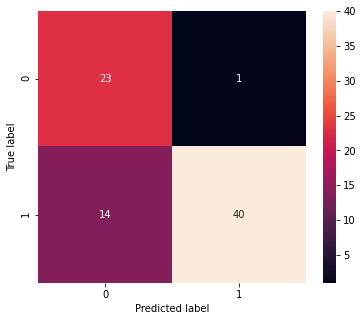

In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [52]:

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)

**********************************************************************
Correct predictions:  63
False predictions 15
**********************************************************************
Accuracy of the Naive Bayes Clasification is 80.77% 
**********************************************************************


In [53]:

#finding accuracy from Sklearn.metrics
from sklearn.metrics import accuracy_score

print('The accuracy of the NB is {}%'.format(round(accuracy_score(y_pred,test_y)*100,2)))

The accuracy of the NB is 80.77%


In [54]:
nvclassifier.predict_proba(test_x.drop('pred_species',axis=1))[:10]

array([[1.34052675e-03, 9.98659473e-01],
       [2.79499723e-05, 9.99972050e-01],
       [6.50908375e-03, 9.93490916e-01],
       [9.80319829e-01, 1.96801714e-02],
       [2.45689738e-04, 9.99754310e-01],
       [4.10838052e-04, 9.99589162e-01],
       [9.33229899e-01, 6.67701006e-02],
       [5.99017080e-23, 1.00000000e+00],
       [9.72955831e-01, 2.70441687e-02],
       [2.08087805e-04, 9.99791912e-01]])

# Conclusion 

## The K- Nearest Neighbor is the best model for the the given data at 85.89% vs Naive Bayes at 80.77%